# Exploring your data

Exploring data is kind of difficult to define because the line between "exploring" and "analyzing" is often blurred. This notebook will focus on the first moments of interaction with a new dataset.

It covers things like making sense of your data, cleaning it, and putting it in a form that's ready to be analyzed. We'll make some simple plots and get our data ready for the next step of analysis (which we'll cover next week).

# Libraries we'll use

## matplotlib and other plotting libraries

matplotlib is the most widely used Python library for plotting.  We can run it in the notebook using the magic command `%matplotlib inline`. If you do not use `%matplotlib inline`, your plots will be generated outside of the notebook and may be difficult to find.  See [the IPython docs](http://ipython.readthedocs.io/en/stable/interactive/plotting.html) for other IPython magics commands.

## The Pandas Library

One of the best options for working with tabular data in Python is the Python Data Analysis Library (a.k.a. Pandas). The Pandas library is built on top of the NumPy package (another Python library). Pandas provides data structures, produces high quality plots with matplotlib, and integrates nicely with other libraries that use NumPy arrays. Those familiar with spreadsheets should become comfortable with Pandas data structures.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Rule 1: Always look at your raw data

It's easy to begin hacking away at a dataset, but how do we know that the data is what it's *supposed* to be? One way to confirm this is to look at the raw data however you can.

We will begin by locating and reading our data which are in a table format as a tab-delimited file. We will use Pandas’ `read_table` function to pull the file directly into a `DataFrame`.

## Why Pandas?

In one word: metadata! Remember the value of contextual information in understanding what's going on with your data / analysis workflows.

Pandas gives us a really useful tool, called a **DataFrame** for representing our data. This lets us keep some metadata along with the raw values themselves.

## What’s a `DataFrame`?
A `DataFrame` is a 2-dimensional data structure that can store in columns data of different types (including characters, integers, floating point values, factors and more). It is similar to a spreadsheet or a SQL table or data.frame in R. A `DataFrame` always has an index (0-based). An index refers to the position of an element in the data structure.

Note that we use `pd.read_table`, not just `read_table` or `pandas.read_table`, because we imported Pandas as `pd`.

In our original file, the columns in the data set are separated by a TAB. We need to tell the `read_table` function in Pandas that that is the delimiter with `sep = ‘\t’`.

In [3]:
path_data = "../02-organization-RR-jupyter/data/gapminderDataFiveYear_superDirty.txt"
#You can also read your table in from a file directory
gapminder = pd.read_table(path_data, sep = "\t")

### Looking at your dataframe
The first thing to do when loading data into the notebook is to actually "look" at it.  How many rows and columns are there?  What types of variables are in it and what values can they take?

There are usually too many rows to print to the screen.  By default, when you type the name of the `DataFrame` and run a cell, Pandas knows to not print the whole thing.  Instead, you will see the first and last few rows with dots in between.  A neater way to see a preview of the dataset is the `head()` method.  Calling `dataset.head()` will display the first 5 rows of the data.  You can specify how many rows you want to see as an argument, like `dataset.head(10)`.  The `tail()` method does the same with the last rows of the `DataFrame`.

In [4]:
gapminder
#head
#tail

,year,pop,life Exp,gdpPercap,region
0,1952.0,8425333.0,28.801,779.445314,Asia_Afghanistan
1,1957.0,9240934.0,30.332,820.853030,Asia_Afghanistan
2,1957.0,9240934.0,30.332,820.853030,Asia_Afghanistan
3,1962.0,10267083.0,31.997,853.100710,Asia_Afghanistan
4,1962.0,NaN,31.997,NaN,Asia_Afghanistan
5,1967.0,11537966.0,34.020,836.197138,Asia_Afghanistan
6,1972.0,13079460.0,36.088,739.981106,Asia_Afghanistan
7,1977.0,14880372.0,38.438,786.113360,Asia_Afghanistan
8,1982.0,12881816.0,39.854,978.011439,Asia_Afghanistan
9,1987.0,13867957.0,40.822,852.395945,Asia_Afghanistan


Sometimes the table has too many columns to print on screen. Calling `df.columns.values` will print all the column names in an array.

In [5]:
gapminder.columns.values

array(['year', 'pop', 'life Exp', 'gdpPercap', 'region'], dtype=object)

If you want to see the raw data itself, you can acess this at `dataset.values`. This is what we'd be looking at if we didn't have Pandas DataFrames to give us contextual information.

In [6]:
gapminder.values

array([[1952.0, 8425333.0, 28.801, 779.4453145, 'Asia_Afghanistan'],
       [1957.0, 9240934.0, 30.331999999999997, 820.8530296,
        'Asia_Afghanistan'],
       [1957.0, 9240934.0, 30.331999999999997, 820.8530296,
        'Asia_Afghanistan'],
       ..., 
       [1997.0, 11404948.0, 46.809, 792.4499602999999, 'Africa_Zimbabwe'],
       [2002.0, 11926563.0, 39.989000000000004, 672.0386227000001,
        'Africa_Zimbabwe'],
       [2007.0, 12311143.0, 43.486999999999995, 469.70929810000007,
        'Africa_Zimbabwe']], dtype=object)

# Rule 2: Assess the cleanliness of the data
Let's get an idea for how "clean" the data is. For example, are the values what we'd expect them to be? Are there any errors we should fix?


## How many rows and columns are in the data?
We often want to know how many rows and columns are in the data -- what is the "shape" of the `DataFrame`. Shape is an attribute of the `DataFrame`. Pandas has a convenient way for getting that information by using `DataFrame.shape`  (using `DataFrame` here as a generic name for your `DataFrame`). This returns a tuple (immutable values separated by commas) representing the dimensions of the `DataFrame` (rows, columns).

To get the shape of the gapminder `DataFrame`:

In [8]:
gapminder.shape

# We can also get more information with methods like `info` and `describe`

(1720, 5)

## Take a subset of columns

The `DataFrame` function `describe()` just blindly looks at all numeric variables. We wouldn't actually want to take the mean year. Additionally, we obtain ‘NaN’ values for our quartiles. This suggests we might have missing data which we can (and will) deal with shortly when we begin to clean our data.

For now, let's pull out only the columns that are truly continuous numbers (i.e. ignore the description for ‘year’). This is a preview of selecting columns from the data; we'll talk more about how to do it later in the lesson.

In [10]:
gapminder[['pop', 'life Exp', 'gdpPercap']]
# .describe()

,pop,life Exp,gdpPercap
count,1.715000e+03,1719.000000,1718.000000
mean,2.954973e+07,59.436493,7208.452200
std,1.058366e+08,12.931041,9838.590984
min,6.001100e+04,23.599000,241.165877
25%,2.807799e+06,48.143000,1203.161887
50%,7.026113e+06,60.523000,3529.585686
75%,1.959366e+07,70.840500,9322.285886
max,1.318683e+09,82.603000,113523.132900


## Assessing whether data is "correct"

Next, let's say you want to see all the unique values for the `region` column. One way to do this is:

In [11]:
pd.unique(gapminder['region'])

array(['Asia_Afghanistan', 'Europe_Albania', 'Africa_Algeria',
       'Africa_Angola', 'Americas_Argentina', 'Oceania_Australia',
       'Europe_Austria', 'Asia_Bahrain', 'Asia_Bangladesh',
       'Europe_Belgium', 'Africa_Benin', 'Americas_Bolivia',
       'Europe_Bosnia and Herzegovina', 'Africa_Botswana',
       'Americas_Brazil', 'Europe_Bulgaria', 'Africa_Burkina Faso',
       'Africa_Burundi', 'Asia_Cambodia', 'Africa_Cameroon', '_Canada',
       'Americas_Canada', 'Africa_Central African Republic',
       'Africa_Central african republic', 'Africa_Chad', 'Americas_Chile',
       'Asia_China', 'Asia_china', 'Americas_Colombia',
       'Americas_Colombia    ', 'Africa_Comoros',
       'Africa_Congo, Dem. Rep.',
       'Africa_Democratic Republic of the Congo',
       'Africa_Congo, Democratic Republic', 'Africa_Congo, Rep.',
       'Americas_Costa Rica', "Africa_Cote d'Ivoire",
       "Africa_Cote d'Ivore", 'Europe_Croatia', 'Americas_Cuba',
       'Europe_Czech Republic', 'Europe

This output is useful, but it looks like there may be some formatting issues causing the same region to be counted more than once. Let's take it a step further and find out to be sure. 

As mentioned previously, the command `value_counts()` gives you a first global idea of your categorical data such as strings. In this case that is the column `region`. Run the code below.

In [14]:
# How many unique regions are in the data?
unique_regions = gapminder['region'].unique()
print(len(unique_regions))

151


In [15]:
# How many times does each unique region occur?
gapminder['region'].value_counts()

Europe_Netherlands                         15
Americas_Dominican Republic                14
Americas_Bolivia                           14
Asia_Afghanistan                           14
Africa_Nigeria                             13
Africa_Algeria                             13
Asia_West Bank and Gaza                    13
Asia_Bangladesh                            13
Africa_Burundi                             13
Americas_Argentina                         13
Europe_United Kingdom                      12
Asia_India                                 12
Africa_Guinea                              12
Asia_Thailand                              12
Europe_Slovenia                            12
Europe_Austria                             12
Americas_Haiti                             12
Asia_Hong Kong, China                      12
Africa_Sao Tome and Principe               12
Africa_Burkina Faso                        12
Africa_Swaziland                           12
Europe_France                     

The table reveals some problems in our data set. The data set covers 12 years, so each ‘region’ should appear 12 times, but some regions appear more than 12 times and others fewer than 12 times. Why is this?

Here are a few possibilities:
* We also see inconsistencies in the region names (string variables are very susceptible to those)
    * for instance: "Asia_china"	vs. "Asia_China"
* There are variations on some names, e.g. the various names of 'Congo'.

In order to analyze this dataset appropriately we need to take care of these issues. We will fix them in the next section on data cleaning.

# Rule 3: Standardize / Clean your data

## Never modify the raw data
This is true for coding as well. If your data isn't too large, a good first step is always to make a copy of it in order to keep a version of the raw data on hand at all times.

### Referencing objects vs copying objects
Before we get started with cleaning our data, let's practice good data hygiene by first creating a copy of our original data set. Often, you want to leave the original data untouched.  To protect your original, you can make a copy of your data (and save it to a new `DataFrame` variable) before operating on the data or a subset of the data.  This will ensure that a new version of the original data is created and your original is preserved.

**Why this is important?**

Suppose you take a subset of your `DataFrame` and store it in a new variable, like `gapminder_early = gapminder[gapminder['year'] < 1970]`.  Doing this does not actually create a new object. Instead, you have just given a name to that subset of the original data: `gapminder_early`. This subset still points to the original rows of `gapminder`.  Any changes you make to the new `DataFrame` `gapminder_early` will appear in the corresponding rows of your original `gapminder` `DataFrame` too.  

In [17]:
gapminder = pd.read_table(path_data, sep = "\t")
gapminder_copy = gapminder.copy()

## Common data cleaning problems

There are all kinds of things that go wrong with data collection, curation, sharing, and storage. Here are just a couple of common things you should look for:

In [18]:
# Let's look at the top of our dataset
gapminder_copy.head()

,year,pop,life Exp,gdpPercap,region
0,1952.0,8425333.0,28.801,779.445314,Asia_Afghanistan
1,1957.0,9240934.0,30.332,820.853030,Asia_Afghanistan
2,1957.0,9240934.0,30.332,820.853030,Asia_Afghanistan
3,1962.0,10267083.0,31.997,853.100710,Asia_Afghanistan
4,1962.0,NaN,31.997,NaN,Asia_Afghanistan


**Missing values** are extremely common. You should figure out what value corresponds to "missing" for your dataset. In our case it's `NaN`, but it could be something like `0`.

In [24]:
gapminder_copy = gapminder_copy.dropna()
gapminder_copy.head()

,year,pop,life_exp,gdppercap,region
0,1952.0,8425333.0,28.801,779.445314,asia_afghanistan
1,1957.0,9240934.0,30.332,820.853030,asia_afghanistan
2,1957.0,9240934.0,30.332,820.853030,asia_afghanistan
3,1962.0,10267083.0,31.997,853.100710,asia_afghanistan
5,1967.0,11537966.0,34.020,836.197138,asia_afghanistan


**Changing data types** is also common. This is because some numbers have a natural "type". This is especially true for things like dates. Look at the years column...it's weird that there's a `.0` at the end of each number. Let's clean that up.

In [25]:
gapminder_copy['year'] = gapminder_copy['year'].astype(int)
gapminder_copy['pop'] = gapminder_copy['pop'].astype(int)
gapminder_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1712 entries, 0 to 1719
Data columns (total 5 columns):
year         1712 non-null int64
pop          1712 non-null int64
life_exp     1712 non-null float64
gdppercap    1712 non-null float64
region       1712 non-null object
dtypes: float64(2), int64(2), object(1)
memory usage: 80.2+ KB


**Duplicates** can occur if people accidentally save datasets twice. We can easily check for this in Pandas.

In [26]:
gapminder_copy.duplicated().head() #shows we have a repetition within the first 5 rows

# We can confirm this with the following command:
# gapminder_copy.head()

0    False
1    False
2     True
3    False
5    False
dtype: bool

In [27]:
# We'll drop the duplicates below
gapminder_copy = gapminder_copy.drop_duplicates()

# Now we'll reset the index of the dataframe since it's off by 1
gapminder_copy = gapminder_copy.reset_index(drop=True)

gapminder_copy.head()

,year,pop,life_exp,gdppercap,region
0,1952,8425333,28.801,779.445314,asia_afghanistan
1,1957,9240934,30.332,820.853030,asia_afghanistan
2,1962,10267083,31.997,853.100710,asia_afghanistan
3,1967,11537966,34.020,836.197138,asia_afghanistan
4,1972,13079460,36.088,739.981106,asia_afghanistan


# Rule 4: Use consistent naming and labeling

Sometimes there are inconsistencies in data. This generally means that the system someone was using to label / create the data changed at some point. This makes it *really hard* to analyze properly. So, we'll take a quick pass and see if we can clean this up.

The `value_counts()` method is really useful here.

In [19]:
gapminder_copy['region'].value_counts()

Europe_Netherlands                         15
Americas_Dominican Republic                14
Americas_Bolivia                           14
Asia_Afghanistan                           14
Africa_Nigeria                             13
Africa_Algeria                             13
Asia_West Bank and Gaza                    13
Asia_Bangladesh                            13
Africa_Burundi                             13
Americas_Argentina                         13
Europe_United Kingdom                      12
Asia_India                                 12
Africa_Guinea                              12
Asia_Thailand                              12
Europe_Slovenia                            12
Europe_Austria                             12
Americas_Haiti                             12
Asia_Hong Kong, China                      12
Africa_Sao Tome and Principe               12
Africa_Burkina Faso                        12
Africa_Swaziland                           12
Europe_France                     

## Modifying text in the data

A good rule of thumb is to turn all strings in your data into **lowercase** letters with **no spaces**.

### Standardizing case and special characters

In [20]:
gapminder_copy['region'] = gapminder_copy['region'].str.lstrip() # Strip white space on left
gapminder_copy['region'] = gapminder_copy['region'].str.rstrip() # Strip white space on right
gapminder_copy['region'] = gapminder_copy['region'].str.lower() # Convert to lowercase
gapminder_copy['region'].value_counts() # How many times does each unique region occur?

# We could have done this in one line!
# gapminder_copy['region'] = gapminder_copy['region'].str.lstrip().str.rstrip().lower()

europe_netherlands                         15
americas_bolivia                           14
asia_afghanistan                           14
americas_dominican republic                14
americas_argentina                         13
africa_algeria                             13
asia_bangladesh                            13
asia_west bank and gaza                    13
africa_burundi                             13
africa_nigeria                             13
americas_colombia                          13
americas_paraguay                          12
africa_eritrea                             12
africa_lesotho                             12
africa_morocco                             12
africa_mozambique                          12
africa_egypt                               12
asia_lebanon                               12
africa_angola                              12
africa_mauritania                          12
americas_trinidad and tobago               12
americas_cuba                     

**We'll do the same for our column names** which will make it much easier to quickly analyze the data.

In [21]:
# Make our columns lowercase
gapminder_copy.columns = gapminder_copy.columns.str.lower()

# Rename columns so that spaces become underscores
gapminder_copy.columns = gapminder_copy.columns.str.replace(' ', '_')
gapminder_copy.head()

,year,pop,life_exp,gdppercap,region
0,1952.0,8425333.0,28.801,779.445314,asia_afghanistan
1,1957.0,9240934.0,30.332,820.853030,asia_afghanistan
2,1957.0,9240934.0,30.332,820.853030,asia_afghanistan
3,1962.0,10267083.0,31.997,853.100710,asia_afghanistan
4,1962.0,NaN,31.997,NaN,asia_afghanistan


### Replacing strings

It's also common to replace entire parts of a string with something else. For example, below we can see that there are many possible namings for this country:

In [22]:
congo_data = gapminder_copy[gapminder_copy['region'].str.contains('congo')]
congo_data['region'].value_counts()

africa_congo, rep.                         12
africa_congo, dem. rep.                    10
africa_democratic republic of the congo     1
africa_congo, democratic republic           1
Name: region, dtype: int64

We'll use the **`.replace`** method to fix thix problem.

In [29]:
gapminder_copy['region'].replace(".*congo, dem.*", "africa_dem rep congo", regex=True, inplace=True)
gapminder_copy['region'].replace(".*_democratic republic of the congo", "africa_dem rep congo", regex=True, inplace=True)


gapminder_copy['region'].replace(".*ivore.*", "africa_cote d'ivoire", regex=True, inplace=True)
gapminder_copy['region'].replace("^_canada", "americas_canada", regex=True, inplace=True)

gapminder_copy['region'].value_counts() # Now it's fixed.

americas_argentina               12
africa_libya                     12
americas_haiti                   12
asia_cambodia                    12
asia_yemen, rep.                 12
europe_greece                    12
americas_panama                  12
europe_france                    12
americas_cuba                    12
africa_cote d'ivoire             12
americas_trinidad and tobago     12
africa_mauritania                12
africa_angola                    12
asia_lebanon                     12
africa_egypt                     12
europe_netherlands               12
europe_bosnia and herzegovina    12
africa_namibia                   12
africa_lesotho                   12
africa_gabon                     12
europe_finland                   12
africa_niger                     12
africa_dem rep congo             12
europe_turkey                    12
americas_mexico                  12
asia_west bank and gaza          12
africa_sierra leone              12
africa_zimbabwe             

**Now our data looks clean**. We see the expected number of values for each country, those countries are labeled reasonably, and we don't have any weird things like missing values.

**What's something that could still be improved in this data?**

In [28]:
gapminder_copy['region'].value_counts().tail()

africa_ethiopia      12
asia_syria           12
americas_peru        12
europe_serbia        12
americas_colombia    12
Name: region, dtype: int64

# Rule 5: Make your data "tidy"

Having what is called a "_Tidy_ data set" can make cleaning, analyzing, and visualizing your data much easier. You should aim for having Tidy data when cleaning and preparing your data set for analysis. Two of the important aspects of Tidy data are:

* every variable has its own column
* every observation has its own row

<img src="http://r4ds.had.co.nz/images/tidy-1.png" style="width:80%" />
(There are other aspects of Tidy data, here is a good blog post about Tidy data in Python: http://www.jeannicholashould.com/tidy-data-in-python.html)

> **Let's take a look at our data. Is everything tidy?**

In [31]:
gapminder_copy.head()

,year,pop,life_exp,gdppercap,region
0,1952,8425333,28.801,779.445314,asia_afghanistan
1,1957,9240934,30.332,820.853030,asia_afghanistan
2,1962,10267083,31.997,853.100710,asia_afghanistan
3,1967,11537966,34.020,836.197138,asia_afghanistan
4,1972,13079460,36.088,739.981106,asia_afghanistan


Currently the gapminder dataset has a single column for continent and country (the ‘region’ column). We can split that column into two, by using the underscore that separates continent from country.
We can create a new column in the `DataFrame` by naming it before the = sign:

`gapminder['country'] = `

The following commands use the function `split()` to split the string at the underscore (the first argument), which results in a list of two elements: before and after the \_. The second argument tells `split()` that the split should take place only at the first occurrence of the underscore.

Below we'll generate two new columns from the "region" column. This ensures that each column only represents one variable.

In [32]:
# Split the "region" column by the "_" character
split_regions = gapminder_copy['region'].str.split('_', 1)
split_regions.head()

0    [asia, afghanistan]
1    [asia, afghanistan]
2    [asia, afghanistan]
3    [asia, afghanistan]
4    [asia, afghanistan]
Name: region, dtype: object

In [33]:
# Create two new variables from the previous column
gapminder_copy['country'] = split_regions.str[1]
gapminder_copy['continent'] = split_regions.str[0]

# Now we'll drop the old region column, and look at the data
gapminder_copy = gapminder_copy.drop('region', 1) #1 stands for column
gapminder_copy.head()

,year,pop,life_exp,gdppercap,country,continent
0,1952,8425333,28.801,779.445314,afghanistan,asia
1,1957,9240934,30.332,820.853030,afghanistan,asia
2,1962,10267083,31.997,853.100710,afghanistan,asia
3,1967,11537966,34.020,836.197138,afghanistan,asia
4,1972,13079460,36.088,739.981106,afghanistan,asia


# Rule 6: Summarize your data

One reason we spent all that time cleaning up our data is because it makes it much easier to quickly ask questions about this data. Usually this means running some quick visualizations to get a handle for what we're dealing with.

In this section, we'll use our tidy dataset to look at some quick summaries of the data.

## Visualization with `matplotlib`

Recall that [matplotlib](http://matplotlib.org) is Python's main visualization 
library. It provides a range of tools for constructing plots and numerous 
high-level plotting libraries (e.g., [Seaborn](http://seaborn.pydata.org)) are 
built with matplotlib in mind. When we were in the early stages of setting up 
our analysis, we loaded these libraries like so:

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline

## Summarizing data

Remember that the `info()` method gives a few useful pieces of information, including the shape of the `DataFrame`, the variable type of each column, and the amount of memory stored. We can see many of our changes (continent and country columns instead of region, higher number of rows, etc.) reflected in the output of the `info()` method.

In [35]:
gapminder_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
year         1704 non-null int64
pop          1704 non-null int64
life_exp     1704 non-null float64
gdppercap    1704 non-null float64
country      1704 non-null object
continent    1704 non-null object
dtypes: float64(2), int64(2), object(2)
memory usage: 80.0+ KB


We also saw above that the `describe()` method will take the numeric columns and give a summary of their values. We have to remember that we changed the column names and this time it shouldn't have NaNs.

In [36]:
gapminder_copy[['pop', 'life_exp', 'gdppercap']].describe()

,pop,life_exp,gdppercap
count,1.704000e+03,1704.000000,1704.000000
mean,2.960121e+07,59.474439,7215.327081
std,1.061579e+08,12.917107,9857.454543
min,6.001100e+04,23.599000,241.165877
25%,2.793664e+06,48.198000,1202.060309
50%,7.023596e+06,60.712500,3531.846989
75%,1.958522e+07,70.845500,9325.462346
max,1.318683e+09,82.603000,113523.132900


### More summaries

What if we just want a single value, like the mean of the population? We can call mean on a single column this way:


In [37]:
gapminder_copy['pop'].mean()

29601212.324530516

Let's visualize the distribution of one of these values, using a histogram:

* __Histograms__ - provide a quick way of visualizing the distribution of numerical
  data, or the frequencies of observations for categorical variables.

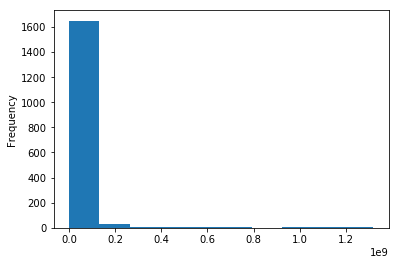

In [40]:
gapminder_copy['pop'].plot.hist()

# Try adding `logy=True`

## Grouping data

What if we want to know the mean population by _continent_? We have this information in the data, but it's currently got one datapoint per country.

We need to **group** the data, and then **aggregate** the values in each group with some statistic.

In pandas we do this with the `groupby()` method.

In [41]:
gapminder_copy[['continent', 'pop']].groupby(by='continent').mean()

# Try the same with other methods like `count` and `median`

,pop
continent,
africa,9916003
americas,24504794
asia,77038721
europe,17169764
oceania,8874672


This is where it becomes useful to visualize our data, for example, with a **barchart**

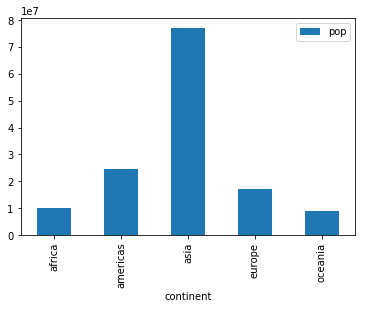

In [42]:
gapminder_copy[['continent', 'pop']].groupby(by='continent').mean().plot.bar()

How about the number of entries (rows) per continent?


In [44]:
count = gapminder_copy[['continent', 'country']].groupby(by='continent').count()
count

,country
continent,
africa,624
americas,300
asia,396
europe,360
oceania,24


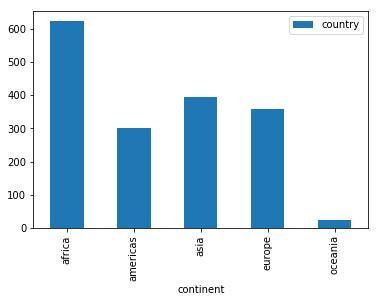

In [45]:
count.plot.bar()

We can also look at the mean GDP per capita of each country: 


In [46]:
gapminder_copy.groupby(by='country').mean()['gdppercap'].head(12)

country
afghanistan      802.674598
albania         3255.366633
algeria         4426.025973
angola          3607.100529
argentina       8955.553783
australia      19980.595634
austria        20411.916279
bahrain        18077.663945
bangladesh       817.558818
belgium        19900.758072
benin           1155.395107
bolivia         2961.228754
Name: gdppercap, dtype: float64

What if we wanted a new `DataFrame` that just contained these summaries? This could be a table in a report, for example.

In [47]:
continent_mean_pop = gapminder_copy[['continent', 'pop']].groupby(by='continent').mean()
continent_mean_pop = continent_mean_pop.rename(columns = {'pop':'meanpop'})
continent_row_ct = gapminder_copy[['continent', 'country']].groupby(by='continent').count()
continent_row_ct = continent_row_ct.rename(columns = {'country':'nrows'})
continent_median_pop = gapminder_copy[['continent', 'pop']].groupby(by='continent').median()
continent_median_pop = continent_median_pop.rename(columns = {'pop':'medianpop'})
gapminder_summs = pd.concat([continent_row_ct,continent_mean_pop,continent_median_pop], axis=1)
gapminder_summs = gapminder_summs.rename(columns = {'y':'year'})
gapminder_summs

,nrows,meanpop,medianpop
continent,,,
africa,624,9916003,4579311
americas,300,24504794,6227510
asia,396,77038721,14530830
europe,360,17169764,8551125
oceania,24,8874672,6403491


When you become a pandas master, you can also do this kind of stuff with one line:

In [48]:
grp = gapminder_copy.groupby('continent')
grp.agg({'pop': ('mean', 'median'), 'country': 'count'})

pop           country
               mean    median   count
continent                            
africa      9916003   4579311     624
americas   24504794   6227510     300
asia       77038721  14530830     396
europe     17169764   8551125     360
oceania     8874672   6403491      24

## Comparing two variables

It's also often useful to compare multiple variables in one plot. There are a bunch of ways to do this. For example, we could use a boxplot to look at the distribution of one variable grouped by another:


* __Boxplots__ - provide a way of comparing the summary measures (e.g., max, min,
  quartiles) across variables in a data set. Boxplots can be particularly useful with larger data sets.


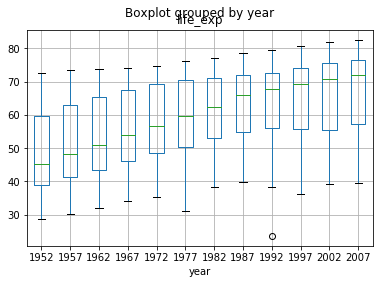

In [51]:
gapminder_copy.boxplot('life_exp', by='year')

### Scatterplots

* __Scatterplots__ - visualization of relationships across two variables...

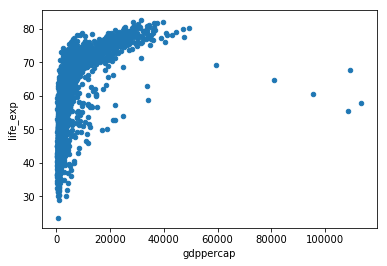

In [52]:
# example plot goes here
gapminder_copy.plot.scatter('gdppercap', 'life_exp')

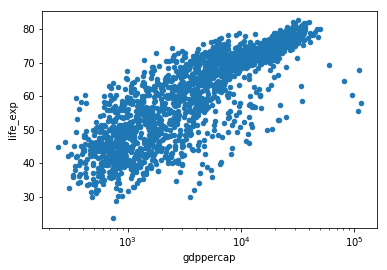

In [53]:
gapminder_copy.plot.scatter('gdppercap', 'life_exp', logx=True)

### Coding information into new variables
Another trick is to add another axis of information in the plot. For example, let's plot a histogram of life expectancy, with the year coded by color:

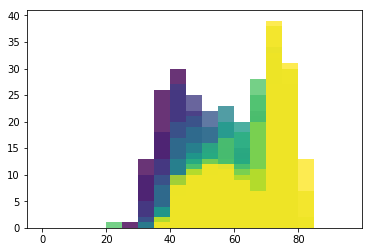

In [54]:
# This uses something called a "for" loop in python to loop through the groups
fig, ax = plt.subplots()
grp_year = gapminder_copy.groupby('year')

# Set color cycles
from matplotlib import cycler
cyc = cycler(color=plt.cm.viridis(np.linspace(0, 1, len(grp_year))))

# Iterate through years
for (year, group), kws in zip(grp_year, cyc):
    ax.hist(group['life_exp'], bins=np.arange(0, 100, 5), alpha=.8, **kws)

We can do the same thing for scatterplots...

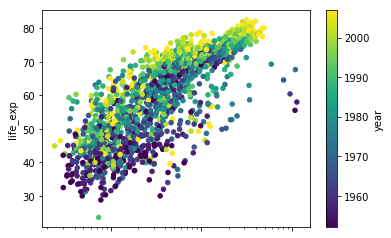

In [55]:
gapminder_copy.plot.scatter('gdppercap', 'life_exp', c='year', logx=True, cmap='viridis')

# Rule 7: Spin off scripts early and often

A big challenge with programming interactively is that you tend to generate messy, complicated files with lots of half-baked ideas in them. For example, in this notebook we've:

* Loaded the data
* Inspected the data
* Cleaned the data
* Computed some summary statistics on it
* Created some visualizations

We should really split this off into multiple files, called scripts, that can be run independently. We'll create a new folder, called `script`, that lives inside of our cleaning folder. In this, we'll put our data munging code, which will generate a new set of data called "cleaned". We'll also generate a new folder called "result" and put our analysis code in this.

Here's what it should look like:

```
projects/
    gapminder/
        data/
            00_raw/
                gapminderDataFiveYear_superDirty.xlsx
            01_cleaning/
                gapminderDataFiveYear_superDirty.xlsx
                scripts/
            02_cleaned/
        result/
            scripts/
```

Put this code in a file called `clean_data.py`

```
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

path_data = "../../../../02-organization-RR-jupyter/data/gapminderDataFiveYear_superDirty.txt"
gapminder = pd.read_table(path_data, sep = "\t")
gapminder_copy = gapminder.copy()

# Drop missing values
gapminder_copy = gapminder_copy.dropna()

# Convert types to int
gapminder_copy['year'] = gapminder_copy['year'].astype(int)
gapminder_copy['pop'] = gapminder_copy['pop'].astype(int)

# Drop duplicates
gapminder_copy = gapminder_copy.drop_duplicates()

# Now we'll reset the index of the dataframe since it's off by 1
gapminder_copy = gapminder_copy.reset_index(drop=True)

# Clean up the strings
gapminder_copy['region'] = gapminder_copy['region'].str.lstrip().str.rstrip().str.lower()

# Make our columns lowercase
gapminder_copy.columns = gapminder_copy.columns.str.lower()

# Rename columns so that spaces become underscores
gapminder_copy.columns = gapminder_copy.columns.str.replace(' ', '_')

# Fix string naming
gapminder_copy['region'].replace(".*congo, dem.*", "africa_dem rep congo", regex=True, inplace=True)
gapminder_copy['region'].replace(".*_democratic republic of the congo", "africa_dem rep congo", regex=True, inplace=True)

gapminder_copy['region'].replace(".*ivore.*", "africa_cote d'ivoire", regex=True, inplace=True)
gapminder_copy['region'].replace("^_canada", "americas_canada", regex=True, inplace=True)

# Tidy the data
split_regions = gapminder_copy['region'].str.split('_', 1)

# Create two new variables from the previous column
gapminder_copy['country'] = split_regions.str[1]
gapminder_copy['continent'] = split_regions.str[0]

# Now we'll drop the old region column, and look at the data
gapminder_copy = gapminder_copy.drop('region', 1) #1 stands for column

# Save the data
path_save = '../cleaned/gapminder_clean.csv'
gapminder_copy.to_csv(path_save)
```

We can now run this script from the command line by doing the following:

In [ ]:
!python clean_data.py

Now we can focus subsequent notebooks etc on visualizing and understanding the actual data.

# Finishing Up

At this point, we've taken a first look at the data, cleaned it up a bit, and have started asking some simple questions with it. However, in order to formally do anything with the data, we need to use actual statistical procedures and more complicated visualizations. We'll focus on this in the final lesson of this series.